# 01 — Data Prep & EDA

Explore the sales time series: trends, seasonality, promotions, and holidays.

             Sales  Promo  Holiday
Date                              
2023-01-01   93.51      0        0
2023-01-02  105.03      0        0
2023-01-03  100.94      0        0
2023-01-04   98.82      0        0
2023-01-05   95.07      0        0
            Sales       Promo     Holiday
count  731.000000  731.000000  731.000000
mean   142.442148    0.088919    0.010944
std     26.426729    0.284822    0.104110
min     86.320000    0.000000    0.000000
25%    121.440000    0.000000    0.000000
50%    142.200000    0.000000    0.000000
75%    163.435000    0.000000    0.000000
max    215.260000    1.000000    1.000000


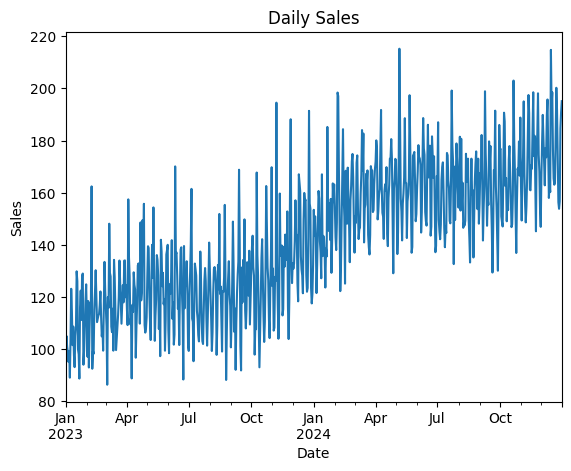

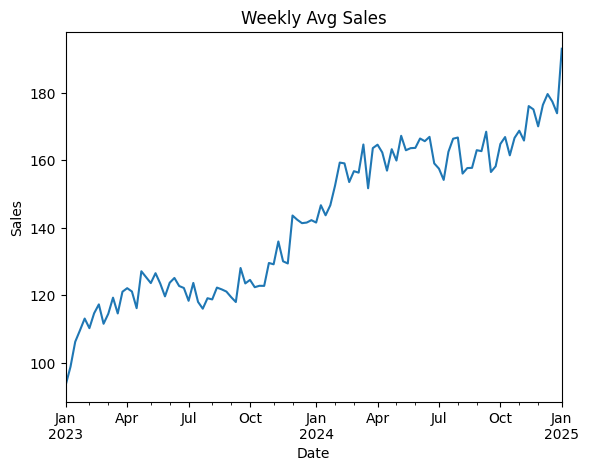

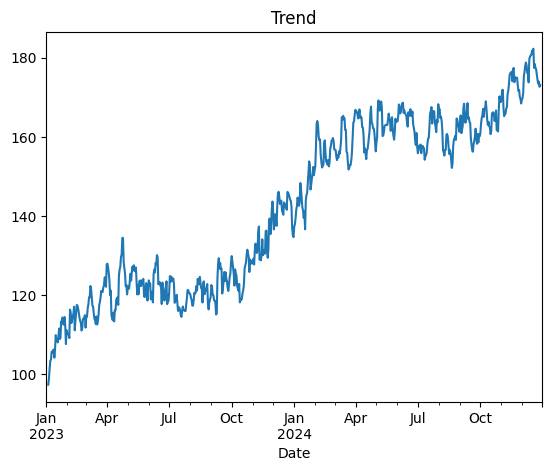

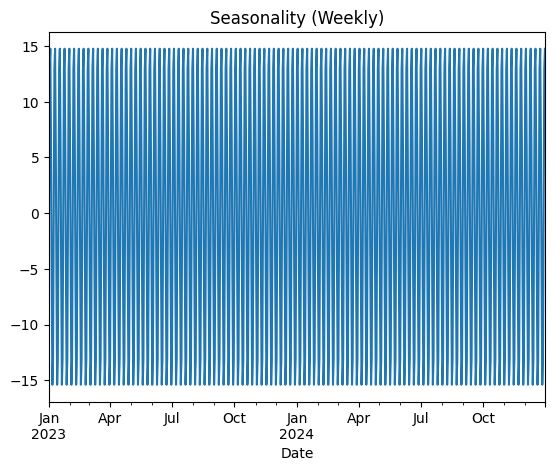

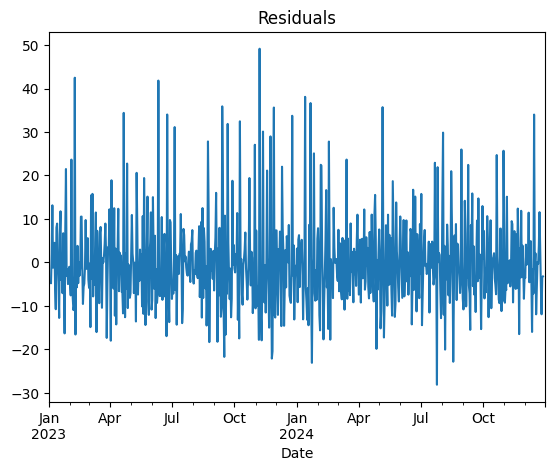

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pathlib import Path

DATA_PATH = Path('../data/sales_synthetic.csv')
df = pd.read_csv(DATA_PATH, parse_dates=['Date'])
df = df.sort_values('Date').set_index('Date')

print(df.head())
print(df.describe())

# Plot raw series
df['Sales'].plot(title='Daily Sales')
plt.ylabel('Sales')
plt.show()

# Weekly average view
df['Sales'].resample('W').mean().plot(title='Weekly Avg Sales')
plt.ylabel('Sales')
plt.show()

# Seasonal decomposition (weekly frequency ~ 7)
res = seasonal_decompose(df['Sales'], period=7, model='additive')
res.trend.plot(title='Trend')
plt.show()
res.seasonal.plot(title='Seasonality (Weekly)')
plt.show()
res.resid.plot(title='Residuals')
plt.show()

In [2]:
# Save prepared series for modeling
prepared = df.copy()
prepared.to_csv('../data/prepared_sales.csv')
prepared.tail()

,Sales,Promo,Holiday
Date,,,
2024-12-27,153.83,0,0
2024-12-28,156.74,0,0
2024-12-29,184.69,0,0
2024-12-30,190.98,0,0
2024-12-31,195.14,0,0
